In [283]:
import glob, os, re, json, pickle
import pandas as pd
from classifier import *
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)

%reload_ext autoreload
%autoreload 2

<ipython-input-283-71a46c7e25ac>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [284]:
df_human = pd.read_json('human_labeled_data.json')
df_human['text'] = df_human['text_data'].str.replace('https[^\s]*\s', '')
df_human['manifestolabel_true'] = df_human['major_label'].str.replace('\d\d\d ','')
# df_human['manifestolabel_true'] = df_human['manifestolabel_true'].replace('ignored','undefined')
df_human = df_human.drop(['text_data','labeled','major_label','selected','taught','labels','users','uncertainty','text_id','predicted_label'],axis=1)
# df_human.to_json('human_labeled_anonymized.json',orient='records')
df_human

text  \
0     Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt! Weltbeste Bildung! Jetzt!                      
1     (2/2) Das TH in das sie gebracht wurde, ist knapp 50km entfernt. Leider wissen wir, wie dort hinter den T√ºren gearbeitet wird und sind sofort hingefahren, um sie da rauszuholen. Daf√ºr mussten wir sie offiziell Adoptieren. Jetzt ist sie bei uns, wird gef√ºttert und gut versorgt!    
2     ‚ÄûHeute gekaufte Autos produzieren √ºber 15 Jahre klimagef√§hrliche Emissionen, Stickoxid und Feinstaub. Wir schlagen uns heute mit den Folgen der letzten Abwrackpr√§mie herum mit zu hohen Treibhausgas-, Feinstaub- und Stickoxidemissionen aus dem Stra√üenverkehr.‚Äú @CKemfert            
3     Wir brauchen eine Opposition. Das macht eine Demokratie aus. Ohne Diskussion gibt es keine Demokratie. Und: Ohne die M√∂glichkeit Kritik zu √ºben, auch nicht. Wenn jede Kritik, z.B. an der Migrationspolitik Nazi ist, dann l√§uft etwa falsch.                                           
4     Rechtsstaat und Demokratie in Europa sch√ºtzen! @katarinabarley und @RobertBiedron stemmen sich gemeinsam gegen die Justizreformen der nationalkonservativen PiS-Regierung in Warschau, die den Rechtsstaat zersetzen. #EU #Rechtsstaat #Demokratie #Polen #Ungarn                        
...                                                                                                                                                                                                                                                                 ...                        
1006  #MSLInsights-Session zur deutschen EU-Ratspr√§sidentschaft mit @KLeikert @cducsubt und den Moderatoren @walli5 und @wigansalazar                                                                                                                                                          
1007  Der gef√§hrlichste Virus ist Rassismus! Es gibt NIE einen Grund f√ºr Rassismus und Diskriminierung! Das Coronavirus kann von allen Menschen √ºbertragen werden. #Ichbinkeinvirus #jenesuispasunvirus #nosoyunvirus #iamnotavirus #coronavirus                                               
1008  Windkraft sch√ºtzt die Umwelt Windkraft sch√ºtzt die Umwelt Windkraft sch√ºtzt die Umwelt Windkraft sch√ºtzt die Umwelt Windkraft sch√ºtzt die Umwelt Und ist wichtiger Teil der @EEnergiewende Alles andere sind Lobbynews der Fossilatomaren Lobby, sind Mythen                             
1009  Reich sind immer die oberen 10 Prozent. Bis nix mehr da ist.                                                                                                                                                                                                                             
1010  Zusammenhalt... #SonyAlpha6000 #photography #fotografie #Natur #spring #Fr√ºhling                                                                                                                                                                                                         

     manifestolabel_true  
0     education +         
1     environmentalism +  
2     environmentalism +  
3     democracy +         
4     democracy +         
...           ...         
1006  ignored             
1007  social justice +    
1008  environmentalism +  
1009  free enterprise +   
1010  ignored             

[1011 rows x 2 columns]

# Classifier trained on manifesto,  tested on tweets

In [285]:
dd = score_texts(df_human)
print(classification_report(dd['manifestolabel_true'],dd['manifestolabel']))

                        precision    recall  f1-score   support

                             0.00      0.00      0.00         0
         agriculture +       0.67      0.67      0.67        12
 anti-growth economy +       0.00      0.00      0.00        16
          centralism +       0.00      0.00      0.00         1
        constitution +       0.00      0.00      0.00         1
        constitution -       0.00      0.00      0.00         1
  controlled economy +       0.00      0.00      0.00         2
             culture +       0.54      0.88      0.67        17
        decentralism +       0.00      0.00      0.00         0
           democracy +       0.86      0.68      0.76       112
        economic goals       0.00      0.00      0.00         1
           education +       0.51      0.84      0.63        43
           education -       0.00      0.00      0.00         2
    environmentalism +       0.60      0.87      0.71       156
              europe +       0.61      

/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train and test on tweets only

In [314]:
df_manifesto = get_manifesto_data()
tweets_train, tweets_test, labels_train,  labels_test = train_test_split(df_human['text'], 
                                                                         df_human['manifestolabel_true'],
                                                                         test_size=.2)
df_manifesto = df_manifesto.sample(n=2000)
train_text = pd.concat([df_manifesto['text'],tweets_train])
train_labels = pd.concat([df_manifesto['manifestolabel'],labels_train]) 

# train_text = tweets_train
# train_labels = labels_train

enough_samples_per_class = train_labels.value_counts() > 10
valid = train_labels.isin(enough_samples_per_class[enough_samples_per_class==True].index)


train_single(train_text[valid], train_labels[valid], 'tweets_only')

df_test = pd.concat([tweets_test,labels_test],axis=1)
df_test.columns = ['text','manifestolabel_true']
tw = score_texts(df_test,['tweets_only'])
print(classification_report(tw['manifestolabel_true'],tw['tweets_only']))

Loading manifesto/manifesto-Germany.csv
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s finished
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

                             0.00      0.00      0.00         0
         agriculture +       0.00      0.00      0.00         3
 anti-growth economy +       0.00      0.00      0.00         4
             culture +       0.67      0.40      0.50         5
           democracy +       1.00      0.48      0.65        21
           education +       0.43      0.30      0.35        10
    environmentalism +       0.80      0.48      0.60        25
              europe +       0.00      0.00      0.00         1
              europe -       0.00      0.00      0.00         1
     foreign special +       0.00      0.00      0.00         3
     free enterprise +       0.00      0.00      0.00         3
freedom/human rights +       0.67      0.33      0.44        12
               ignored       0.67      0.07      0.12        30
          incentives +       0.00      0.00      0.00         1
      infrastructure +       0.00      

/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [252]:
train_text = pd.concat([df_manifesto['text'],df_human['text']])
train_labels = pd.concat([df_manifesto['manifestolabel'],
                          df_human['manifestolabel_true']]) 
train_single(train_text, train_labels, 'all_tweets')

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.0s finished
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [253]:
# read all tweets and remove those that were labeled
df_tweets = pd.read_json('tweets_all.json.gzip',compression='gzip')
df_tweets['text'] = df_tweets['text'].fillna('')
df_tweets = df_tweets[df_tweets.text.isin(df_human['text']) == False]
df_tweets

index  \
0       0        
1       1        
2       2        
3       3        
4       4        
...    ..        
851806  584564   
851807  584565   
851808  584566   
851809  596562   
851810  596563   

                                                                                                                                                                                                                                                                                 text  \
0       Rede √ºber Deine Vision und Ziele! Als viertes #Prinzip muss ein #Unternehmer #Manager seine #Mitarbeiter und sein Umfeld von der Realit√§t seiner #Vision und #Ziele √ºberzeugen. #Reden um #Begeisterung in den Menschen entfachen: https://www.wissen-agentur.de/w-zzb05.html   
1       Ruff(us) Brevett Lassie Diarra Graham FENTON FENTON FEEENNNNTTTOOONN Wesley Schnauser                                                                                                                                                                                           
2       Mal ernsthaft diese Tweets in in denen st√§ndig davon die Rede ist das es keinen Rassismus gegen wei√üe gibt regen mich sowas von auf. Nur weil es mehr wei√üe auf der Welt gibt, bedeutet es nicht das sie nicht trotzdem rassistisch behandelt werden k√∂nnen.                    
3       Ich m√∂chte gerne sie haben recht                                                                                                                                                                                                                                                
4       Sehr gerne - ich freue mich, wenn es hilft                                                                                                                                                                                                                                      
...                                             ...                                                                                                                                                                                                                                     
851806  @edanui @Nubss666 Ne ich meine von ihren eltern                                                                                                                                                                                                                                 
851807  @Karl_Lauterbach @KonstantinKuhle @fdp Hallo liebe Zahnfee, ass mal Deine Familie sch√∂n raus. Du Twitterst doch oder? Wenn ich was schreibe hat meine Familie damit auch nix am Hut. Die Tr√§nendr√ºse kannst Du Dir sparen.                                                      
851808  DEINE ELTERN SIND GESCHWISTER @tanjirxxo #Splatoon2 #NintendoSwitch https://t.co/T86buGgV9n                                                                                                                                                                                     
851809  Kangen EXO bund :( https://t.co/GTJ4QuuKpU                                                                                                                                                                                                                                      
851810  @kuuutangx Di WETV bund                                                                                                                                                                                                                                                         

                                                                   url  \
0       https://twitter.com/WISSENAgentur/status/1223029926003126273     
1       https://twitter.com/BarrowsMikeOtto/status/1223025959869218816   
2       https://twitter.com/liam_witte/status/1223024892263784449        
3       https://twitter.com/Sara60603304/status/1223022275034742789      
4       https://twitter.com/katha_kren

In [198]:
df_scored = score_texts(df_tweets, label_types=['all_tweets'], min_precision=.3)
df_scored.reset_index().to_json('tweets_all_scored.json.gzip',compression='gzip')

In [246]:
df_scored = pd.read_json('tweets_all_scored.json.gzip',compression='gzip')
dates = pd.date_range('1/1/2020', periods=12, freq='M')
for i,d in enumerate(dates[:-1]):
    idx = (df_scored['date']>dates[i]) & (df_scored['date']<dates[i+1])
    tweets_per_month = len(df_scored[idx])
    print(f'{d}:{tweets_per_month}') 

2020-01-31 00:00:00:75567
2020-02-29 00:00:00:232031
2020-03-31 00:00:00:270150
2020-04-30 00:00:00:76265
2020-05-31 00:00:00:0
2020-06-30 00:00:00:0
2020-07-31 00:00:00:0
2020-08-31 00:00:00:0
2020-09-30 00:00:00:0
2020-10-31 00:00:00:34
2020-11-30 00:00:00:45182


In [241]:
df_scored['manifestolabel'] = df_scored['all_tweets']
above_length_idx = df_scored['text'].apply(len) > 50
low_precision = df_scored['all_tweets'] == ''
ignored = df_scored['all_tweets'] == 'ignored'
interacted_with = df_scored[['replies','retweets','likes']].sum(axis=1)>10
df_scored = df_scored[above_length_idx & interacted_with & ~ignored & ~low_precision]
df_scored['tweet_with_url'] = df_scored['url'] + " " + df_scored['text']
df_scored = df_scored.drop(['index','level_0','quotes','all_tweets_proba','all_tweets'],axis=1)
df_scored.to_json('tweets_with_url.json.gzip',compression='gzip')


In [243]:
df_scored['before'] = df_scored['date'] < pd.Timestamp(2020,3,15)


In [244]:
df_scored['before'].value_counts()

False    3307
True     2894
Name: before, dtype: int64

In [245]:
for i,d in enumerate(dates[:-1]):
    idx = (df_scored['date']>dates[i]) & (df_scored['date']<dates[i+1])
    tweets_per_month = len(df_scored[idx])
    print(f'{d}:{tweets_per_month}') 

2020-01-31 00:00:00:1031
2020-02-29 00:00:00:1380
2020-03-31 00:00:00:1374
2020-04-30 00:00:00:1067
2020-05-31 00:00:00:0
2020-06-30 00:00:00:0
2020-07-31 00:00:00:0
2020-08-31 00:00:00:0
2020-09-30 00:00:00:0
2020-10-31 00:00:00:2
2020-11-30 00:00:00:260


In [78]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)
above_precision_idx = df_scored['manifestolabel'] != ''
above_length_idx = df_scored['text'].apply(len) > 50
interacted_with = (df_scored['favorites'] > 10) | \
                    (df_scored['replies'] > 10) | \
                    (df_scored['retweets'] > 10)
valid = above_length_idx & above_precision_idx & interacted_with
df_scored.loc[valid,:].head(n=20)

<ipython-input-78-9967ece9758d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


username               to  \
154   the_aeschli      None              
316   HMWK_Hessen      None              
1503  FabianGramling   None              
2105  AutorToto        None              
2477  markuspreiss     None              
3013  EberleSebastian  hannahuenniger    
3088  plattsport       None              
3161  S_Schicketanz    None              
3756  mediumflow       Alice_Weidel      
3816  TimDemisch       None              
3883  cem_oezdemir     None              
4553  LaurinLues       None              
5388  cogries          MonopolMagazin    
5862  KerstinKhler3    None              
5872  DIEtaschana      None              
5938  holgertma        None              
6882  TheresiaBauer    None              
7166  moeller_laboe    BlackDo04913777   
7498  holgertma        None              
8517  munichrocker     c_endt            

                                                                                                                                                                                                                                                                                                                                                                      text  \
154   Klima Umweltschutz Rechtsrutsch Korruption Hass und Hetze Bildung Armut Gesundheitskosten Krieg und Terror Und dann eines Morgens in der Schweiz: Fondue-Emoji                                                                                                                                                                                                         
316   Mit dem Haushalt 2020 st√§rken wir die Bedeutung von Wissenschaft und Kultur Ministerin @Angela_Dorn hat heute in ihrer Rede im @Landtag_Hessen betont, dass Wissenschaft und Kultur in bewegten Zeiten Leitlinien setzen und Denkanst√∂√üe bieten k√∂nnen.                                                                                                                
1503  Viele wollen mehr Frauen an der Spitze! Wir haben die richtige Spitzenkandidatin mit Susanne Eisenmann - mit Mut und Entschlossenheit die richtigen Entscheidungen treffen. F√ºr uns, f√ºr ein starkes Baden-W√ºrttemberg! #Sch√∂ntal20 #cdu #ltw21 @CDU_BW @CDU_FraktionBW                                                                                                
2105  ‚ÄûDies ist eine Welt, in der Kraftmeier in L√§ndern wie #China und #Russland massiv aufr√ºsten, und #Europa sitzt herum und redet √ºber Green Deals. Ich w√ºrde sagen: Hallo? Aufwachen!‚Äú Niall #Ferguson https://www.welt.de/wirtschaft/plus205258763/Niall-Ferguson-Merkels-Kanzlerschaft-war-ein-kolossaler-Ausfall.html?wtmc=socialmedia.twitter.shared.web via @welt   
2477  ‚ÄûChina ist noch immer das gr√∂√üte Entwicklungsland der Welt.‚Äú Sagt der Vize-Premier des Landes. Und auch das sieht beim #WEF20 sicher nicht jeder so. Stichwort: WTO und unterschiedliche Regeln f√ºr Industrie- und Entwicklungsl√§nder.                                                                                                                                 
3013  Ich unterstelle mal, die Kollegin hat keine Ahnung, wie sich Krieg ‚Äûanf√ºhlt‚Äú. Im Gegensatz zu den Menschen in Idlib. Oder im Jemen. Aber so g√§nsehautm√§√üig √ºber die Uniformen derer schwadronieren, die im Zweifel ihr Leben f√ºr unsere Freiheit lassen m√ºssen. Kann man machen...                                                                                     
3088  Wenn es Niederlagen gegen Rabenball gibt, bin ich gerne sehr schlechter Verlierer.                                                                                                                                                                                                                                                                                     
3161  #Brandenburgs Kulturministerin @ManjaSchuele mit einer eindringlichen Rede beim #Neujahrsempfang #Potsdam. Sie fordert unverz√ºglichen Einsatz gegen Angriffe Rec

In [79]:
df_scored.loc[valid,:]

username    to  \
154     the_aeschli     None   
316     HMWK_Hessen     None   
1503    FabianGramling  None   
2105    AutorToto       None   
2477    markuspreiss    None   
...              ...     ...   
263932  reitschuster    NaN    
264884  TheBerlinLive   NaN    
266032  Vel0Le          NaN    
266444  m0ndin0         NaN    
267671  StaatstheaterN  NaN    

                                                                                                                                                                                                                                                                                                                                                                        text  \
154     Klima Umweltschutz Rechtsrutsch Korruption Hass und Hetze Bildung Armut Gesundheitskosten Krieg und Terror Und dann eines Morgens in der Schweiz: Fondue-Emoji                                                                                                                                                                                                         
316     Mit dem Haushalt 2020 st√§rken wir die Bedeutung von Wissenschaft und Kultur Ministerin @Angela_Dorn hat heute in ihrer Rede im @Landtag_Hessen betont, dass Wissenschaft und Kultur in bewegten Zeiten Leitlinien setzen und Denkanst√∂√üe bieten k√∂nnen.                                                                                                                
1503    Viele wollen mehr Frauen an der Spitze! Wir haben die richtige Spitzenkandidatin mit Susanne Eisenmann - mit Mut und Entschlossenheit die richtigen Entscheidungen treffen. F√ºr uns, f√ºr ein starkes Baden-W√ºrttemberg! #Sch√∂ntal20 #cdu #ltw21 @CDU_BW @CDU_FraktionBW                                                                                                
2105    ‚ÄûDies ist eine Welt, in der Kraftmeier in L√§ndern wie #China und #Russland massiv aufr√ºsten, und #Europa sitzt herum und redet √ºber Green Deals. Ich w√ºrde sagen: Hallo? Aufwachen!‚Äú Niall #Ferguson https://www.welt.de/wirtschaft/plus205258763/Niall-Ferguson-Merkels-Kanzlerschaft-war-ein-kolossaler-Ausfall.html?wtmc=socialmedia.twitter.shared.web via @welt   
2477    ‚ÄûChina ist noch immer das gr√∂√üte Entwicklungsland der Welt.‚Äú Sagt der Vize-Premier des Landes. Und auch das sieht beim #WEF20 sicher nicht jeder so. Stichwort: WTO und unterschiedliche Regeln f√ºr Industrie- und Entwicklungsl√§nder.                                                                                                                                 
...                                                                                                                                                                                                                                        ...                                                                                                                                 
263932  Die Wahl von #Kemmerich in #Th√ºringen sprengt Risse in die politische Grabplatte, die Merkel &amp; Co. auf unsere Politik gelegt haben. Ihre ‚ÄûAlternativlosigkeits‚Äú-Strategie droht zu scheitern. Der Aufschrei ist so gewaltig, weil Linksgr√ºn jetzt um seine Hegemonie f√ºrchten muss.                                                                                
264884  ich w√ºnsche allen ein sch√∂nes #Osterfest auch wenn es dieses Jahr anders verl√§uft als sonst, wir m√ºssen durchhalten auch wenn's schwer f√§llt macht das beste draus #OsternAndersErleben #wirbleibenzuhaus #FlattenTheCuve und #AbstandHalten beim #Spaziergang                                                                                                         
266032  Jedes Jahr das gleiche: 14¬∞C ‚Äî lang oder kurz? #Rennrad                                                                                                                                                                                                                       

In [80]:
df_scored['tweet_with_url'] = df_scored['permalink'] + " " + df_scored['text']
df_scored.loc[valid,['tweet_with_url']]
# ?df_scored.loc[valid & (df_scored['urls']),['text','urls']]

tweet_with_url
154     https://twitter.com/the_aeschli/status/1222859159432986626 Klima Umweltschutz Rechtsrutsch Korruption Hass und Hetze Bildung Armut Gesundheitskosten Krieg und Terror Und dann eines Morgens in der Schweiz: Fondue-Emoji                                                                                                                                                                                                    
316     https://twitter.com/HMWK_Hessen/status/1222582125758754819 Mit dem Haushalt 2020 st√§rken wir die Bedeutung von Wissenschaft und Kultur Ministerin @Angela_Dorn hat heute in ihrer Rede im @Landtag_Hessen betont, dass Wissenschaft und Kultur in bewegten Zeiten Leitlinien setzen und Denkanst√∂√üe bieten k√∂nnen.                                                                                                           
1503    https://twitter.com/FabianGramling/status/1221001255071506432 Viele wollen mehr Frauen an der Spitze! Wir haben die richtige Spitzenkandidatin mit Susanne Eisenmann - mit Mut und Entschlossenheit die richtigen Entscheidungen treffen. F√ºr uns, f√ºr ein starkes Baden-W√ºrttemberg! #Sch√∂ntal20 #cdu #ltw21 @CDU_BW @CDU_FraktionBW                                                                                        
2105    https://twitter.com/AutorToto/status/1220133424951889922 ‚ÄûDies ist eine Welt, in der Kraftmeier in L√§ndern wie #China und #Russland massiv aufr√ºsten, und #Europa sitzt herum und redet √ºber Green Deals. Ich w√ºrde sagen: Hallo? Aufwachen!‚Äú Niall #Ferguson https://www.welt.de/wirtschaft/plus205258763/Niall-Ferguson-Merkels-Kanzlerschaft-war-ein-kolossaler-Ausfall.html?wtmc=socialmedia.twitter.shared.web via @welt
2477    https://twitter.com/markuspreiss/status/1219613762463903744 ‚ÄûChina ist noch immer das gr√∂√üte Entwicklungsland der Welt.‚Äú Sagt der Vize-Premier des Landes. Und auch das sieht beim #WEF20 sicher nicht jeder so. Stichwort: WTO und unterschiedliche Regeln f√ºr Industrie- und Entwicklungsl√§nder.                                                                                                                           
...                                                                                                                                                                                                                                                                                                    ...                                                                                                                           
263932  https://twitter.com/reitschuster/status/1225049612353970178 Die Wahl von #Kemmerich in #Th√ºringen sprengt Risse in die politische Grabplatte, die Merkel &amp; Co. auf unsere Politik gelegt haben. Ihre ‚ÄûAlternativlosigkeits‚Äú-Strategie droht zu scheitern. Der Aufschrei ist so gewaltig, weil Linksgr√ºn jetzt um seine Hegemonie f√ºrchten muss.                                                                          
264884  https://twitter.com/TheBerlinLive/status/1249211170562678789 ich w√ºnsche allen ein sch√∂nes #Osterfest auch wenn es dieses Jahr anders verl√§uft als sonst, wir m√ºssen durchhalten auch wenn's schwer f√§llt macht das beste draus #OsternAndersErleben #wirbleibenzuhaus #FlattenTheCuve und #AbstandHalten beim #Spaziergang                                                                                                  
266032  https://twitter.com/Vel0Le/status/1246740517708353539 Jedes Jahr das gleiche: 14¬∞C ‚Äî lang oder kurz? #Rennrad                                                                                                                                                                                                                                                                                                                
266444  https://twitter.com/m0ndin0/status/1245790547555635207 das jahr ist eh so reingeschissen, dass lijana doch perfekt #GNTM 2020 werden sollte 

In [81]:
df_scored.loc[valid,['tweet_with_url']].reset_index().to_json('tweets_with_permalink.json')

In [82]:
df_scored.loc[valid, 'manifestolabel'].value_counts()

political authority +     1009
environmentalism +        900 
social justice +          770 
democracy +               324 
freedom/human rights +    198 
education +               181 
infrastructure +          154 
europe +                  101 
welfare +                 93  
labour +                  83  
market regulation +       70  
law and order +           63  
culture +                 50  
non economic groups +     45  
military -                28  
internationalism +        27  
military +                26  
agriculture +             26  
social harmony +          25  
traditional morality +    17  
gov-admin efficiency +    17  
minority groups +         11  
anti-growth economy +     11  
decentralism +            10  
peace +                   9   
economic orthodoxy +      7   
economic goals            6   
national way of life +    5   
traditional morality -    4   
foreign special +         4   
incentives +              3   
productivity +            3   
free ent

In [83]:
df_scored.loc[valid, 'before'].value_counts()

False    2149
True     2137
Name: before, dtype: int64

In [84]:
((df_scored.loc[valid & df_scored['after'],'manifestolabel_keywords'].value_counts() / df_scored.loc[valid & df_scored['before'],'manifestolabel_keywords'].value_counts()).sort_values()).dropna()

democracy +               0.098039
free enterprise +         0.166667
constitution -            0.333333
political authority +     0.398190
protectionism +           0.500000
political corruption -    0.500000
incentives +              0.500000
foreign special +         0.500000
education -               0.500000
education +               0.500000
internationalism -        0.526946
national way of life -    0.550173
welfare -                 0.562500
culture +                 0.571429
internationalism +        0.655914
marxist analysis +        0.666667
protectionism -           0.666667
europe +                  0.700000
labour -                  0.714286
infrastructure +          0.728814
national way of life +    0.733333
foreign special -         0.750000
social justice +          0.797101
peace +                   0.840336
market regulation +       0.875000
law and order +           0.941176
traditional morality -    0.957317
economic planning +       1.000000
minority groups +   

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = [x.strip() for x in open('stopwords.txt').readlines()[7:]]
vect = CountVectorizer(stop_words=stopwords).fit(df_scored['text'])
before_words = vect.transform(df_scored.loc[df_scored['before'],'text'])
after_words = vect.transform(df_scored.loc[df_scored['after'],'text'])

/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bsp', 'ca', 'hen', 'kurgan', 'matveev', 'solc'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [86]:
import numpy as np
keywords = pd.read_csv('keywords.csv')
all_keywords = pd.Series(keywords.values.flatten()).dropna().to_list()
idx2word = {v:k for k,v in vect.vocabulary_.items()}

In [87]:
before = np.array(before_words.sum(axis=0)) + 1
before = before / before.max()
after = np.array(after_words.sum(axis=0)) + 1
after = after / after.max()
increase = (after / before).flatten()
inc_idx = [idx for idx in increase.argsort() if idx2word[idx] in all_keywords]

In [88]:
top = 1000
most_increase = {idx2word[i]:increase[i] for i in inc_idx[-top:-1:] }
least_increase = {idx2word[i]:increase[i] for i in inc_idx[:top]}
# print(most_increase)
# print(least_increase)
pd.Series(most_increase).to_csv('increased.csv')
pd.Series(least_increase).to_csv('decreased.csv')

In [89]:
pd.Series(keywords.values.flatten()).dropna()

0       landwirtschaft 
1       nachhaltigkeit 
2       gottfried      
3       bund           
4       grundgesetz    
           ...         
1115    frau           
1116    kitas          
1117    eheschlie√üung  
1118    wohngeld       
1119    √ºbersichtlichen
Length: 1119, dtype: object

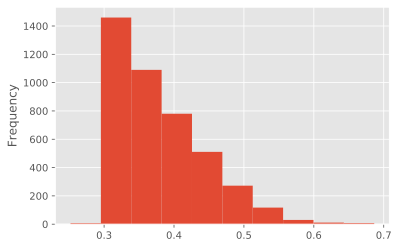

In [91]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df_scored.loc[valid,'all_tweets_proba'].plot.hist()

In [92]:
# df_scored.loc[valid,'domain_proba'].plot.hist()

KeyError: 'domain_proba'

In [ ]:
plt.figure(figsize=[5,15]);
ddd = pd.DataFrame(
    [df_scored.loc[valid & df_scored['after'],'manifestolabel'].value_counts(normalize=True), 
     df_scored.loc[valid & df_scored['before'],'manifestolabel'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .1].plot.barh()

plt.ylim([-1,15.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after.pdf')

<Figure size 360x1080 with 0 Axes>

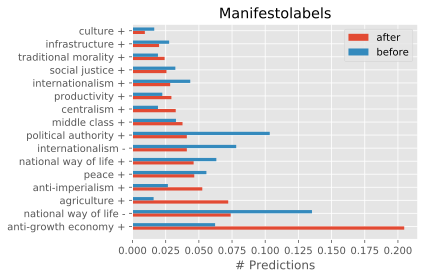

In [71]:
plt.figure(figsize=[5,15])

ddd = pd.DataFrame(
    [df_scored.loc[valid & df_scored['after'],'manifestolabel_keywords'].value_counts(normalize=True), 
     df_scored.loc[valid & df_scored['before'],'manifestolabel_keywords'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .1].plot.barh()


plt.ylim([-1,15.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after_keywords.pdf')

In [72]:
ddd = pd.DataFrame(
    [df_scored.loc[valid & df_scored['after'],'domain'].value_counts(normalize=True), 
     df_scored.loc[valid & df_scored['before'],'domain'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .01].plot.barh()



plt.title('Political Domains')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('domains_before_after.pdf')

KeyError: 'domain'

In [73]:
pd.DataFrame(
    [df_scored.loc[valid & df_scored['after'],'rightleft'].value_counts(normalize=True), 
     df_scored.loc[valid & df_scored['before'],'rightleft'].value_counts(normalize=True)],
    index=['before','after']).T.plot.bar()


KeyError: 'rightleft'

In [74]:
from classifier import get_manifesto_data
df = get_manifesto_data()
df

Loading manifesto/manifesto-Germany.csv


text  \
0      Es ist Zeit f√ºr einen Wechsel                                                                                          
1      Die Bundesrepublik braucht eine neue, eine soziale und √∂kologische Politik                                             
2      Die Herausforderungen eines neuen Jahrhunderts sind nicht mit den Konzepten von gestern und vorgestern zu bew√§ltigen   
3      Politik kann nicht alle Probleme l√∂sen                                                                                 
4      Aber Politik mu√ü ihren Teil zur L√∂sung der Probleme beitragen                                                          
...                                                              ...                                                          
48471  Deutschland braucht qualifizierte und integrationswillige Zuwanderung.                                                 
48472  ‚Ä¢  Wir fordern ein Einwanderungsgesetz nach kanadischem Vorbild.                                                       
48473  Eine ungeordnete Zuwanderung in unsere Sozialsysteme muss unbedingt unterbunden werden.                                
48474  ‚Ä¢  Ernsthaft politisch Verfolgte m√ºssen in Deutschland Asyl finden k√∂nnen.                                             
48475  Zu einer menschenw√ºrdigen Behandlung geh√∂rt auch, dass Asylbewerber hier arbeiten k√∂nnen.                              

       manifestocodes                 domain rightleft          manifestolabel  
0      0               None                   None      undefined               
1      303             Political System       None      gov-admin efficiency +  
2      303             Political System       None      gov-admin efficiency +  
3      0               None                   None      undefined               
4      0               None                   None      undefined               
...   ..                ...                    ...            ...               
48471  608             Fabric of Society      None      multiculturalism -      
48472  607             Fabric of Society      None      multiculturalism +      
48473  601             Fabric of Society      right     national way of life +  
48474  201             Freedom and Democracy  right     freedom/human rights +  
48475  201             Freedom and Democracy  right     freedom/human rights +  

[48476 rows x 5 columns]

In [75]:
from classifier import get_manifesto_data
df = get_manifesto_data()
df['manifestolabel'] = df['manifestocodes'].astype('str') + " " + df['manifestolabel']
# df[['text','manifestolabel']]
df[['text','manifestolabel']].to_json('manifestodata.json')

Loading manifesto/manifesto-Germany.csv


In [146]:
from datetime import datetime
df_keywords = pd.read_csv('keywords.csv')
maxTweets = 1000
save_dir='tweets'
dates = pd.date_range('1/1/2020', periods=12, freq='M')

for week_idx, date in enumerate(dates):
    for label in df_keywords.columns:
        keywords = df_keywords[label]
        ss = label.replace('/','-')
        savestr = os.path.join(save_dir,f'{ss}-{date}.json')
        start = f'{dates[week_idx]}'[:10]
        stop = f'{dates[week_idx+1]}'[:10]
        print(f'{datestr}: Fetching tweets in range {start} - {stop} for keywords: {keywords}')

        tweets = []
        query = " OR ".join(keywords) + " lang:de" + ' since:' + start + "until:" + stop
        # Using TwitterSearchScraper to scrape data and append tweets to list
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
            if i>maxTweets:
                break
            tweets.append(tweet.__dict__)


        print(f'Found {len(tweets)} tweets')
        if len(tweets)>0:
            pd.DataFrame(tweets).to_json(savestr, orient='records', lines=True)
#except:

2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     landwirtschaft         
1     landwirte              
2     bauern                 
3     agrarpolitik           
4     ern√§hrungswirtschaft   
5     landwirtschaftlichen   
6     forstwirtschaft        
7     kulturlandschaft       
8     b√§uerinnen             
9     landwirtschaftliche    
10    landwirten             
11    b√§uerlichen            
12    b√§uerliche             
13    landwirtinnen          
14    kulturlandschaftspr√§mie
15    l√§ndlichen             
16    betriebe               
17    multifunktionalen      
18    r√§ume                  
19    landwirt               
Name: agriculture +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     nachhaltige        
1     √∂kologische        
2     nachhaltigkeit     
3     nachhaltiges       
4     nachhaltigen       
5     √∂kologischen       
6     √∂kologi

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     stadtumbau              
1     ost                     
2     solidarpakt             
3     west                    
4     programm                
5     wohnungsm√§rkte          
6     ii                      
7     stadt                   
8     planungssicherheit      
9     aufbau                  
10    bahnhofsmodernisierung  
11    programme               
12    strategie               
13    st√§dtebauliche          
14    strukturschw√§che        
15    hightech                
16    st√§dtebauf√∂rderung      
17    beispielloses           
18    investitionszulagens√§tze
19    wohnqualit√§t            
Name: economic planning +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     bildung              
1     hochschulen          
2     schulen              
3     studierenden         
4     schule    

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     forschung              
1     infrastruktur          
2     weiterbildung          
3     technologien           
4     mobilit√§t              
5     ausbildung             
6     innovation             
7     innovationen           
8     verkehr                
9     ausbau                 
10    entwicklung            
11    verkehrsinfrastruktur  
12    bahn                   
13    schiene                
14    berufsausbildung       
15    forschungseinrichtungen
16    investitionen          
17    √∂pnv                   
18    berufliche             
19    duale                  
Name: infrastructure +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     nationen                  
1     vereinten                 
2     internationalen           
3     internationale            
4     entwicklungszusamm

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     behinderungen            
1     migrantinnen             
2     opfer                    
3     migranten                
4     behinderte               
5     behinderung              
6     behinderten              
7     barrierefreiheit         
8     fl√ºchtlinge              
9     behinderter              
10    minderheiten             
11    leben                    
12    behindertenpolitik       
13    integration              
14    lesben                   
15    barrierefrei             
16    schwule                  
17    hilfe                    
18    migrationshintergrund    
19    selbstvertretungsanspruch
Name: minority groups +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     einwanderungsland    
1     integration          
2     vielfalt             
3     einb√ºrgerung         
4  

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     engagement          
1     b√ºrgerschaftliches  
2     solidarit√§t         
3     ehrenamt            
4     zusammenhalt        
5     ehrenamtliche       
6     gesellschaft        
7     zivilgesellschaft   
8     engagements         
9     ehrenamtliches      
10    engagieren          
11    freiwilligendienste 
12    ehrenamtlich        
13    b√ºrgerschaftlichen  
14    vereinen            
15    b√ºrgergesellschaft  
16    freiwilligen        
17    freiwilligendiensten
18    ehrenamtlichen      
19    initiativen         
Name: social harmony +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-01-31 - 2020-02-29 for keywords: 0     frauen            
1     gerechtigkeit     
2     teilhabe          
3     einkommen         
4     m√§nnern           
5     m√§nner            
6     gleiche           
7     diskriminierung   
8     herkun

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     mindestlohn          
1     gesetzlichen         
2     fl√§chendeckenden     
3     vergleichsmiete      
4     mindestlohns         
5     orts√ºblichen         
6     auftragnehmern       
7     franz√∂sischem        
8     mieterh√∂hungen       
9     vorschreibt          
10    gesetzlicher         
11    stunde               
12    euro                 
13    bestandswohnungen    
14    mindestlohnkommission
15    wiedervermietungen   
16    lohnspirale          
17    maximal              
18    vorzuschieben        
19    angespannten         
Name: controlled economy +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     arbeitgebern        
1     sozialpartnerschaft 
2     gewerkschaften      
3     tarifautonomie      
4     sozialpartnern      
5     tarifparteien       
6     arbeitnehmern       
7

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     russland            
1     partnerschaft       
2     beziehungen         
3     transatlantische    
4     transatlantischen   
5     amerika             
6     israel              
7     israels             
8     nehmender           
9     widerlichkeit       
10    grundkonstante      
11    staatsr√§son         
12    stottert            
13    deutsch             
14    verantwortlicher    
15    russlands           
16    enge                
17    partnerschafts      
18    partner             
19    kooperationsabkommen
Name: foreign special +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     raketenstationierungen
1     wiederaufflackern     
2     vereinnahmung         
3     hegemonialer          
4     st√ºtzpunkte           
5     oppositionellen       
6     auftretende           
7     bestre

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     kriminalit√§t       
1     polizei            
2     gewalt             
3     straftaten         
4     bek√§mpfen          
5     steuerhinterziehung
6     bek√§mpfung         
7     sicherheit         
8     justiz             
9     t√§ter              
10    terrorismus        
11    organisierte       
12    sicherheitsbeh√∂rden
13    illegale           
14    kampf              
15    strafverfolgung    
16    verbrechen         
17    jugendkriminalit√§t 
18    extremismus        
19    schutz             
Name: law and order +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     verbraucher       
1     verbraucherinnen  
2     marktwirtschaft   
3     wettbewerb        
4     banken            
5     verbraucherschutz 
6     finanzm√§rkte      
7     unternehmen       
8     regeln            
9     l

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     frauen       
1     kinder       
2     √§ltere       
3     jugendliche  
4     junge        
5     kindern      
6     gewalt       
7     m√§dchen      
8     jugendpolitik
9     √§lteren      
10    jugendlichen 
11    √§lterer      
12    alter        
13    jungen       
14    generationen 
15    m√§nner       
16    generation   
17    frauenh√§usern
18    frauenh√§user 
19    eigenst√§ndige
Name: non economic groups +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     frieden               
1     friedenspolitik       
2     krisenpr√§vention      
3     zivile                
4     zivilen               
5     friedens              
6     konfliktbearbeitung   
7     friedensdienst        
8     konflikte             
9     konfliktpr√§vention    
10    konfliktforschung     
11    nahen             

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-02-29 - 2020-03-31 for keywords: 0     vorsorge          
1     private           
2     eigenverantwortung
3     altersvorsorge    
4     betriebliche      
5     rentenversicherung
6     eigenvorsorge     
7     kapitalgedeckte   
8     alterssicherung   
9     kapitaldeckung    
10    rente             
11    kapitalgedeckten  
12    gesetzlichen      
13    altersversorgung  
14    betriebsrenten    
15    privaten          
16    arbeitslosengeld  
17    betrieblichen     
18    gesetzliche       
19    alter             
Name: welfare -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     landwirtschaft         
1     landwirte              
2     bauern                 
3     agrarpolitik           
4     ern√§hrungswirtschaft   
5     landwirtschaftlichen   
6     forstwirtschaft        
7     kulturlandschaft       
8     b√§uerinnen       

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     schulden               
1     haushalte              
2     konsolidierung         
3     neuverschuldung        
4     euro                   
5     solide                 
6     schuldenbremse         
7     finanzen               
8     w√§hrung                
9     haushaltskonsolidierung
10    staatsfinanzen         
11    milliarden             
12    stabile                
13    bundeshaushalt         
14    verschuldung           
15    einnahmen              
16    ausgaben               
17    schuldenabbau          
18    finanzpolitik          
19    haushaltspolitik       
Name: economic orthodoxy +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     stadtumbau              
1     ost                     
2     solidarpakt             
3     west                    
4     programm               

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     unternehmen         
1     mittelstand         
2     kleine              
3     existenzgr√ºnder     
4     wagniskapital       
5     mittelst√§ndische    
6     mittlere            
7     mittleren           
8     rahmenbedingungen   
9     handwerk            
10    existenzgr√ºndungen  
11    existenzgr√ºnderinnen
12    betriebe            
13    investoren          
14    capital             
15    erp                 
16    venture             
17    mittelst√§ndischen   
18    f√∂rderung           
19    f√∂rdern             
Name: incentives +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     forschung              
1     infrastruktur          
2     weiterbildung          
3     technologien           
4     mobilit√§t              
5     ausbildung             
6     innovation             
7   

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     abr√ºstung               
1     atomwaffen              
2     bundeswehr              
3     r√ºstungskontrolle       
4     wehrpflicht             
5     milit√§rischen           
6     massenvernichtungswaffen
7     r√ºstungsexporte         
8     nato                    
9     waffen                  
10    milit√§rische            
11    nuklearen               
12    abzug                   
13    nichtverbreitung        
14    nukleare                
15    milit√§rischer           
16    krieg                   
17    konventionellen         
18    landminen               
19    zivile                  
Name: military -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     behinderungen            
1     migrantinnen             
2     opfer                    
3     migranten                
4     behi

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     handelshemmnisse         
1     exportsubventionen       
2     doha                     
3     abschottung              
4     anbaugebieten            
5     m√§rkte                   
6     protektionismus          
7     wto                      
8     hauptexportprodukten     
9     handelsbarrieren         
10    welthandel               
11    entwicklungsl√§nder       
12    degradieren              
13    markt√∂ffnung             
14    rascher                  
15    runde                    
16    verhandlungen            
17    entwicklungsl√§ndern      
18    fortgang                 
19    investitionspartnerschaft
Name: protectionism -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-03-31 - 2020-04-30 for keywords: 0     engagement          
1     b√ºrgerschaftliches  
2     solidarit√§t         
3     ehrenamt            
4    

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     grundgesetz           
1     kinderrechte          
2     gg                    
3     abs√§tze               
4     staatsziel            
5     gleichheitsrechte     
6     verankern             
7     geldwertwertstabilit√§t
8     abs                   
9     kooperationsverbots   
10    fernmeldegeheimnis    
11    halbteilungsgrundsatz 
12    art                   
13    lauschangriffs        
14    landesverfassungen    
15    briefgeheimnis        
16    bundesfinanzhilfen    
17    klausel               
18    streichung            
19    antifaschistische     
Name: constitution -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     mindestlohn          
1     gesetzlichen         
2     fl√§chendeckenden     
3     vergleichsmiete      
4     mindestlohns         
5     orts√ºblichen         
6     au

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     europ√§ische         
1     europa              
2     eu                  
3     europ√§ischen        
4     union               
5     mitgliedstaaten     
6     europas             
7     kommission          
8     gemeinsame          
9     gemeinsamen         
10    europ√§ischer        
11    ratspr√§sidentschaft 
12    staaten             
13    frankreich          
14    vertrag             
15    europ√§er            
16    ebene               
17    verteidigungspolitik
18    parlament           
19    w√§hrungsunion       
Name: europe +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     eu                          
1     mitgliedstaaten             
2     union                       
3     europ√§ischen                
4     europ√§ische                 
5     grenzschutzagentur          
6     fr

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     arbeit            
1     besch√§ftigten     
2     arbeitnehmer      
3     arbeitsbedingungen
4     arbeitnehmerinnen 
5     arbeitspl√§tze     
6     l√∂hne             
7     besch√§ftigung     
8     arbeitszeit       
9     arbeitsmarkt      
10    arbeitszeiten     
11    besch√§ftigte      
12    arbeitslosigkeit  
13    gewerkschaften    
14    leiharbeit        
15    tarifvertr√§ge     
16    minijobs          
17    arbeitsplatz      
18    jobs              
19    betriebsr√§te      
Name: labour +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     drittelparit√§t          
1     vorstandsentscheidungen 
2     gewerkschaftsvertretern 
3     abfindungsregelungen    
4     arbeitsgerichtsprozessen
5     einstellungshemmnis     
6     besch√§ftigungsdauer     
7     aufsichtsrat            
8     gew

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     npd                 
1     rechtsextremismus   
2     antisemitismus      
3     rassismus           
4     nationalismus       
5     verbotsverfahren    
6     fremdenhass         
7     allheilmittel       
8     verbot              
9     ns                  
10    neofaschistischen   
11    nazistrukturen      
12    opferrechter        
13    fremdenfeindlichkeit
14    wachsame            
15    kampf               
16    anschlussf√∂rderungen
17    beobachtungsstelle  
18    rassisch            
19    bundesprogramme     
Name: national way of life -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     privatisierung          
1     daseinsvorsorge         
2     hand                    
3     eigentum                
4     √∂ffentliche             
5     √∂ffentlicher            
6     wasserversorgung 

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     lebensgemeinschaften 
1     lebenspartnerschaften
2     f√ºreinander          
3     gleichgeschlechtliche
4     paare                
5     cannabis             
6     ehen                 
7     drogen               
8     eingetragene         
9     patchwork            
10    eingetragenen        
11    ehegattensplitting   
12    adoptionsrecht       
13    abgabeform           
14    individualbesteuerung
15    regenbogenfamilien   
16    lebenspartnerschaft  
17    jugendschutzes       
18    adoptiv              
19    pflegeeltern         
Name: traditional morality -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-04-30 - 2020-05-31 for keywords: 0     versorgung          
1     grundsicherung      
2     pflege              
3     rente               
4     leistungen          
5     rentenversicherung  
6     kindergeld          
7 

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-05-31 - 2020-06-30 for keywords: 0     demokratie       
1     demokratische    
2     b√ºrgerinnen      
3     parlament        
4     demokratischen   
5     b√ºrger           
6     bundestag        
7     kontrolle        
8     beteiligung      
9     demokratisch     
10    entscheidungen   
11    transparenz      
12    b√ºrgerbeteiligung
13    mitbestimmung    
14    parlamente       
15    wahlrecht        
16    demokratischer   
17    parteien         
18    demokratisierung 
19    afd              
Name: democracy +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-05-31 - 2020-06-30 for keywords: 0     arbeitspl√§tze        
1     besch√§ftigung        
2     wettbewerbsf√§higkeit 
3     r√§ume                
4     l√§ndlichen           
5     arbeit               
6     regionen             
7     ostdeutschland       
8     l√§ndliche            
9     wirtschaftsstruk

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-05-31 - 2020-06-30 for keywords: 0     menschenrechte         
1     freiheit               
2     daten                  
3     b√ºrgerrechte           
4     datenschutz            
5     selbstbestimmung       
6     grundrechte            
7     recht                  
8     √ºberwachung            
9     menschenw√ºrde          
10    asyl                   
11    vorratsdatenspeicherung
12    schutz                 
13    rechte                 
14    informationelle        
15    menschenrechten        
16    grundrecht             
17    meinungsfreiheit       
18    b√ºrger                 
19    privatsph√§re           
Name: freedom/human rights +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-05-31 - 2020-06-30 for keywords: 0     b√ºrokratie           
1     verwaltung           
2     vereinfachung        
3     effizienz            
4     reform               
5     

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-05-31 - 2020-06-30 for keywords: 0     mittelstand          
1     mitte                
2     r√ºckgrat             
3     berufe               
4     handwerk             
5     gesundheitshandwerker
6     geisteshaltung       
7     patientennahe        
8     heilmittelerbringer  
9     apotheker            
10    recheneinheit        
11    zahn√§rzte            
12    leistungstr√§ger      
13    handwerker           
14    freiberuflich        
15    anerkennt            
16    berufskammern        
17    berufsst√§ndische     
18    entlastung           
19    anwalt               
Name: middle class +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-05-31 - 2020-06-30 for keywords: 0     bundeswehr         
1     soldaten           
2     nato               
3     soldatinnen        
4     ausr√ºstung         
5     streitkr√§fte       
6     einsatz            
7     b√ºndn

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-05-31 - 2020-06-30 for keywords: 0     wachstum           
1     wirtschaftswachstum
2     wirtschaftliches   
3     wohlstand          
4     besch√§ftigung      
5     aufbau             
6     wirtschaftliche    
7     brachliegenden     
8     voraussetzung      
9     dynamik            
10    altbundesl√§ndern   
11    tr√ºmpfe            
12    problemregionen    
13    gewerbes           
14    stabiles           
15    nachhaltiges       
16    ost                
17    beschleunigtes     
18    schaffendes        
19    verarbeitenden     
Name: productivity +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-05-31 - 2020-06-30 for keywords: 0     freihandels            
1     freihandelsabkommen    
2     transnationaler        
3     behandelter            
4     dogmen                 
5     wto                    
6     aufgedr√§ngt            
7     aufkommenden        

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     bund               
1     betreuungsstandards
2     l√§ndern            
3     bildungsstandards  
4     kooperationsverbot 
5     abschlussbezogene  
6     bundesweit         
7     schulsystemen      
8     energiekonzepten   
9     verst√§ndigen       
10    siebzehn           
11    g√ºltige            
12    l√§nder             
13    steuervollzug      
14    f√§chern            
15    jugendpl√§ne        
16    kommunen           
17    kleinstaaterei     
18    verh√§ngt           
19    gemeinsame         
Name: centralism +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     grundgesetz       
1     grundgesetzes     
2     verfassung        
3     werteordnung      
4     forderndes        
5     werteger√ºst       
6     gesellschaftsbild 
7     freiheitlichste   
8     unantastbar       
9     zus

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     hochschulen           
1     hochschulsanierungen  
2     tr√§gerschaft          
3     privatwirtschaftliches
4     sponsoring            
5     studienbeitr√§ge       
6     gefos                 
7     studieng√§ngen         
8     lehrangebot           
9     bereichern            
10    hochschulsystems      
11    bildungslandschaft    
12    studienentgelte       
13    etabliert             
14    private               
15    markteintritt         
16    obliegt               
17    schulen               
18    beweglich             
19    staatlichen           
Name: education -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     klimaschutz     
1     umwelt          
2     energien        
3     natur           
4     emissionen      
5     klima           
6     erneuerbaren    
7     erneuerbare  

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     globalisierungskritikerinnen
1     partnerstaaten              
2     entwicklungsl√§nder          
3     ureigene                    
4     budgethilfen                
5     gewaltsame                  
6     kritiker                    
7     mexiko                      
8     verantwortung               
9     umweltzerst√∂rung            
10    indien                      
11    brasilien                   
12    entwicklungshilfegeldern    
13    entwicklungspolitik         
14    gewordenen                  
15    nachkommen                  
16    entwicklungszusammenarbeit  
17    ausdehnung                  
18    straff√§llig                 
19    quoten                      
Name: internationalism -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     binnennachfrage         
1     investitionen   

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     integration           
1     zuwanderung           
2     erlernen              
3     zuwanderern           
4     sprache               
5     zuwandernden          
6     parallelgesellschaften
7     zuwanderer            
8     gelingende            
9     erfolgswillen         
10    st√§rkster             
11    zugewanderten         
12    erfolgreiche          
13    mi√ülingt              
14    hinreichende          
15    gelungener            
16    inkonsequenz          
17    integrationserfolge   
18    schmelztiegel         
19    begrenzung            
Name: multiculturalism -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     land        
1     sprache     
2     deutschlands
3     deutsche    
4     deutschen   
5     zuwanderung 
6     kulturnation
7     heimat      
8     landes      
9  

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     familien               
1     familie                
2     eltern                 
3     kinder                 
4     vereinbarkeit          
5     beruf                  
6     kindern                
7     christlichen           
8     kirchen                
9     erziehung              
10    geborgenheit           
11    familienpolitik        
12    gesellschaft           
13    erziehen               
14    kind                   
15    familienfreundlicher   
16    religionsgemeinschaften
17    wertevermittelnde      
18    christliche            
19    zukunftsbeitrag        
Name: traditional morality +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-06-30 - 2020-07-31 for keywords: 0     lebensgemeinschaften 
1     lebenspartnerschaften
2     f√ºreinander          
3     gleichgeschlechtliche
4     paare                
5     canna

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-07-31 - 2020-08-31 for keywords: 0     kultur           
1     kunst            
2     kulturelle       
3     sport            
4     kulturpolitik    
5     k√ºnstlerinnen    
6     kulturellen      
7     k√ºnstler         
8     kulturf√∂rderung  
9     √∂ffentlich       
10    medien           
11    rundfunk         
12    vielfalt         
13    museen           
14    theater          
15    kreativwirtschaft
16    bibliotheken     
17    rundfunks        
18    musik            
19    f√∂rderung        
Name: culture +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-07-31 - 2020-08-31 for keywords: 0     kommunen            
1     gemeinden           
2     l√§nder              
3     bund                
4     kommunalen          
5     ort                 
6     kommunale           
7     selbstverwaltung    
8     st√§dte              
9     l√§ndern             
10    h

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-07-31 - 2020-08-31 for keywords: 0     raketenstationierungen
1     wiederaufflackern     
2     vereinnahmung         
3     hegemonialer          
4     st√ºtzpunkte           
5     oppositionellen       
6     auftretende           
7     bestrebungen          
8     gazastreifens         
9     abzuwehren            
10    westbank              
11    inhaftierung          
12    armeen                
13    abr√ºstungsfragen      
14    landnahme             
15    raketenschirm         
16    jerusalem             
17    konfrontations        
18    scheuen               
19    interventionspolitik  
Name: foreign special -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-07-31 - 2020-08-31 for keywords: 0     eigenverantwortung
1     wettbewerb        
2     private           
3     privatisierung    
4     staat             
5     unternehmen       
6     markt             


Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-07-31 - 2020-08-31 for keywords: 0     verbraucher       
1     verbraucherinnen  
2     marktwirtschaft   
3     wettbewerb        
4     banken            
5     verbraucherschutz 
6     finanzm√§rkte      
7     unternehmen       
8     regeln            
9     lebensmittel      
10    verbraucherpolitik
11    produkte          
12    regulierung       
13    verbrauchern      
14    kennzeichnung     
15    kunden            
16    lebensmitteln     
17    faire             
18    fairen            
19    informationen     
Name: market regulation +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-07-31 - 2020-08-31 for keywords: 0     neoliberalismus      
1     kapitalismus         
2     herrschenden         
3     finanzkapitalismus   
4     sozialismus          
5     kapitalistische      
6     sozialistische       
7     kr√§fteverh√§ltnisse   
8     neuanfangs           


Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-07-31 - 2020-08-31 for keywords: 0     koalition      
1     fraktion       
2     genau          
3     bundesregierung
4     afd            
5     glaube         
6     antrag         
7     richtig        
8     regierung      
9     thema          
10    finde          
11    kollege        
12    worden         
13    punkt          
14    land           
15    frage          
16    stelle         
17    bisschen       
18    debatte        
19    ehrlich        
Name: political authority +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-07-31 - 2020-08-31 for keywords: 0     korruption             
1     abgeordnetenbestechung 
2     nebeneink√ºnfte         
3     bestechlichkeit        
4     abgeordneten           
5     rechtsverh√§ltnisse     
6     bestechung             
7     abgeordnetengesetz     
8     verstrickte            
9     spenden                
10    parte

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     nachhaltige        
1     √∂kologische        
2     nachhaltigkeit     
3     nachhaltiges       
4     nachhaltigen       
5     √∂kologischen       
6     √∂kologisch         
7     wirtschaften       
8     wachstum           
9     entwicklung        
10    nachhaltig         
11    √∂kologischer       
12    umwelt             
13    sozial             
14    lebensqualit√§t     
15    ressourcenverbrauch
16    wirtschaftsweise   
17    nat√ºrlichen        
18    umbau              
19    transformation     
Name: anti-growth economy +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     machtpolitischer       
1     interventionismus      
2     machtinteressen        
3     orientierende          
4     punktesysteme          
5     selektiven             
6     zuwider                
7     neokolonial

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     bildung              
1     hochschulen          
2     schulen              
3     studierenden         
4     schule               
5     lehre                
6     lernen               
7     sch√ºler              
8     studium              
9     bildungseinrichtungen
10    ganztagsschulen      
11    ausbildung           
12    bildungssystem       
13    sch√ºlerinnen         
14    lehrer               
15    kinder               
16    wissenschaft         
17    forschung            
18    studienpl√§tze        
19    universit√§ten        
Name: education +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     hochschulen           
1     hochschulsanierungen  
2     tr√§gerschaft          
3     privatwirtschaftliches
4     sponsoring            
5     studienbeitr√§ge       
6     gefos            

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     nationen                  
1     vereinten                 
2     internationalen           
3     internationale            
4     entwicklungszusammenarbeit
5     zusammenarbeit            
6     staaten                   
7     afrika                    
8     entwicklungsl√§nder        
9     sicherheitsrat            
10    entwicklungspolitik       
11    globale                   
12    au√üenpolitik              
13    entwicklungsl√§ndern       
14    vn                        
15    china                     
16    globalen                  
17    uno                       
18    russland                  
19    kooperation               
Name: internationalism +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     globalisierungskritikerinnen
1     partnerstaaten              
2     entwicklungsl√§nd

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     einwanderungsland    
1     integration          
2     vielfalt             
3     einb√ºrgerung         
4     staatsangeh√∂rigkeit  
5     interkulturelle      
6     staatsb√ºrgerschaft   
7     kulturen             
8     integrationspolitik  
9     minderheiten         
10    muslime              
11    einwanderung         
12    mehrsprachigkeit     
13    gesellschaft         
14    islam                
15    weltoffenes          
16    doppelte             
17    ausl√§ndischen        
18    kulturellen          
19    migrationshintergrund
Name: multiculturalism +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     integration           
1     zuwanderung           
2     erlernen              
3     zuwanderern           
4     sprache               
5     zuwandernden          
6     parallelgese

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     frauen            
1     gerechtigkeit     
2     teilhabe          
3     einkommen         
4     m√§nnern           
5     m√§nner            
6     gleiche           
7     diskriminierung   
8     herkunft          
9     gleichstellung    
10    armut             
11    gleichberechtigung
12    gesellschaft      
13    unabh√§ngig        
14    soziale           
15    chancen           
16    chancengleichheit 
17    sozialen          
18    gerechte          
19    prozent           
Name: social justice +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-08-31 - 2020-09-30 for keywords: 0     familien               
1     familie                
2     eltern                 
3     kinder                 
4     vereinbarkeit          
5     beruf                  
6     kindern                
7     christlichen           
8     kirchen  

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     arbeitgebern        
1     sozialpartnerschaft 
2     gewerkschaften      
3     tarifautonomie      
4     sozialpartnern      
5     tarifparteien       
6     arbeitnehmern       
7     arbeitgeberverb√§nden
8     verabredeten        
9     tarifpartnern       
10    einspruchsrecht     
11    tarifpartnerschaften
12    arbeitsmarktmodell  
13    jahrzehntealte      
14    bestehend           
15    konsumentenverb√§nde 
16    tarifpartner        
17    zusammenspiel       
18    arbeitgeberverb√§n   
19    tarifvereinbarungen 
Name: corporatism +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     kultur           
1     kunst            
2     kulturelle       
3     sport            
4     kulturpolitik    
5     k√ºnstlerinnen    
6     kulturellen      
7     k√ºnstler         
8     kulturf√∂rderung  

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     russland            
1     partnerschaft       
2     beziehungen         
3     transatlantische    
4     transatlantischen   
5     amerika             
6     israel              
7     israels             
8     nehmender           
9     widerlichkeit       
10    grundkonstante      
11    staatsr√§son         
12    stottert            
13    deutsch             
14    verantwortlicher    
15    russlands           
16    enge                
17    partnerschafts      
18    partner             
19    kooperationsabkommen
Name: foreign special +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     raketenstationierungen
1     wiederaufflackern     
2     vereinnahmung         
3     hegemonialer          
4     st√ºtzpunkte           
5     oppositionellen       
6     auftretende           
7     bestre

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     kriminalit√§t       
1     polizei            
2     gewalt             
3     straftaten         
4     bek√§mpfen          
5     steuerhinterziehung
6     bek√§mpfung         
7     sicherheit         
8     justiz             
9     t√§ter              
10    terrorismus        
11    organisierte       
12    sicherheitsbeh√∂rden
13    illegale           
14    kampf              
15    strafverfolgung    
16    verbrechen         
17    jugendkriminalit√§t 
18    extremismus        
19    schutz             
Name: law and order +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     verbraucher       
1     verbraucherinnen  
2     marktwirtschaft   
3     wettbewerb        
4     banken            
5     verbraucherschutz 
6     finanzm√§rkte      
7     unternehmen       
8     regeln            
9     l

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     frauen       
1     kinder       
2     √§ltere       
3     jugendliche  
4     junge        
5     kindern      
6     gewalt       
7     m√§dchen      
8     jugendpolitik
9     √§lteren      
10    jugendlichen 
11    √§lterer      
12    alter        
13    jungen       
14    generationen 
15    m√§nner       
16    generation   
17    frauenh√§usern
18    frauenh√§user 
19    eigenst√§ndige
Name: non economic groups +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     frieden               
1     friedenspolitik       
2     krisenpr√§vention      
3     zivile                
4     zivilen               
5     friedens              
6     konfliktbearbeitung   
7     friedensdienst        
8     konflikte             
9     konfliktpr√§vention    
10    konfliktforschung     
11    nahen             

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-09-30 - 2020-10-31 for keywords: 0     vorsorge          
1     private           
2     eigenverantwortung
3     altersvorsorge    
4     betriebliche      
5     rentenversicherung
6     eigenvorsorge     
7     kapitalgedeckte   
8     alterssicherung   
9     kapitaldeckung    
10    rente             
11    kapitalgedeckten  
12    gesetzlichen      
13    altersversorgung  
14    betriebsrenten    
15    privaten          
16    arbeitslosengeld  
17    betrieblichen     
18    gesetzliche       
19    alter             
Name: welfare -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     landwirtschaft         
1     landwirte              
2     bauern                 
3     agrarpolitik           
4     ern√§hrungswirtschaft   
5     landwirtschaftlichen   
6     forstwirtschaft        
7     kulturlandschaft       
8     b√§uerinnen       

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     schulden               
1     haushalte              
2     konsolidierung         
3     neuverschuldung        
4     euro                   
5     solide                 
6     schuldenbremse         
7     finanzen               
8     w√§hrung                
9     haushaltskonsolidierung
10    staatsfinanzen         
11    milliarden             
12    stabile                
13    bundeshaushalt         
14    verschuldung           
15    einnahmen              
16    ausgaben               
17    schuldenabbau          
18    finanzpolitik          
19    haushaltspolitik       
Name: economic orthodoxy +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     stadtumbau              
1     ost                     
2     solidarpakt             
3     west                    
4     programm               

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     unternehmen         
1     mittelstand         
2     kleine              
3     existenzgr√ºnder     
4     wagniskapital       
5     mittelst√§ndische    
6     mittlere            
7     mittleren           
8     rahmenbedingungen   
9     handwerk            
10    existenzgr√ºndungen  
11    existenzgr√ºnderinnen
12    betriebe            
13    investoren          
14    capital             
15    erp                 
16    venture             
17    mittelst√§ndischen   
18    f√∂rderung           
19    f√∂rdern             
Name: incentives +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     forschung              
1     infrastruktur          
2     weiterbildung          
3     technologien           
4     mobilit√§t              
5     ausbildung             
6     innovation             
7   

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     abr√ºstung               
1     atomwaffen              
2     bundeswehr              
3     r√ºstungskontrolle       
4     wehrpflicht             
5     milit√§rischen           
6     massenvernichtungswaffen
7     r√ºstungsexporte         
8     nato                    
9     waffen                  
10    milit√§rische            
11    nuklearen               
12    abzug                   
13    nichtverbreitung        
14    nukleare                
15    milit√§rischer           
16    krieg                   
17    konventionellen         
18    landminen               
19    zivile                  
Name: military -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     behinderungen            
1     migrantinnen             
2     opfer                    
3     migranten                
4     behi

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     handelshemmnisse         
1     exportsubventionen       
2     doha                     
3     abschottung              
4     anbaugebieten            
5     m√§rkte                   
6     protektionismus          
7     wto                      
8     hauptexportprodukten     
9     handelsbarrieren         
10    welthandel               
11    entwicklungsl√§nder       
12    degradieren              
13    markt√∂ffnung             
14    rascher                  
15    runde                    
16    verhandlungen            
17    entwicklungsl√§ndern      
18    fortgang                 
19    investitionspartnerschaft
Name: protectionism -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-10-31 - 2020-11-30 for keywords: 0     engagement          
1     b√ºrgerschaftliches  
2     solidarit√§t         
3     ehrenamt            
4    

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     grundgesetz           
1     kinderrechte          
2     gg                    
3     abs√§tze               
4     staatsziel            
5     gleichheitsrechte     
6     verankern             
7     geldwertwertstabilit√§t
8     abs                   
9     kooperationsverbots   
10    fernmeldegeheimnis    
11    halbteilungsgrundsatz 
12    art                   
13    lauschangriffs        
14    landesverfassungen    
15    briefgeheimnis        
16    bundesfinanzhilfen    
17    klausel               
18    streichung            
19    antifaschistische     
Name: constitution -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     mindestlohn          
1     gesetzlichen         
2     fl√§chendeckenden     
3     vergleichsmiete      
4     mindestlohns         
5     orts√ºblichen         
6     au

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     europ√§ische         
1     europa              
2     eu                  
3     europ√§ischen        
4     union               
5     mitgliedstaaten     
6     europas             
7     kommission          
8     gemeinsame          
9     gemeinsamen         
10    europ√§ischer        
11    ratspr√§sidentschaft 
12    staaten             
13    frankreich          
14    vertrag             
15    europ√§er            
16    ebene               
17    verteidigungspolitik
18    parlament           
19    w√§hrungsunion       
Name: europe +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     eu                          
1     mitgliedstaaten             
2     union                       
3     europ√§ischen                
4     europ√§ische                 
5     grenzschutzagentur          
6     fr

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     arbeit            
1     besch√§ftigten     
2     arbeitnehmer      
3     arbeitsbedingungen
4     arbeitnehmerinnen 
5     arbeitspl√§tze     
6     l√∂hne             
7     besch√§ftigung     
8     arbeitszeit       
9     arbeitsmarkt      
10    arbeitszeiten     
11    besch√§ftigte      
12    arbeitslosigkeit  
13    gewerkschaften    
14    leiharbeit        
15    tarifvertr√§ge     
16    minijobs          
17    arbeitsplatz      
18    jobs              
19    betriebsr√§te      
Name: labour +, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     drittelparit√§t          
1     vorstandsentscheidungen 
2     gewerkschaftsvertretern 
3     abfindungsregelungen    
4     arbeitsgerichtsprozessen
5     einstellungshemmnis     
6     besch√§ftigungsdauer     
7     aufsichtsrat            
8     gew

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     npd                 
1     rechtsextremismus   
2     antisemitismus      
3     rassismus           
4     nationalismus       
5     verbotsverfahren    
6     fremdenhass         
7     allheilmittel       
8     verbot              
9     ns                  
10    neofaschistischen   
11    nazistrukturen      
12    opferrechter        
13    fremdenfeindlichkeit
14    wachsame            
15    kampf               
16    anschlussf√∂rderungen
17    beobachtungsstelle  
18    rassisch            
19    bundesprogramme     
Name: national way of life -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     privatisierung          
1     daseinsvorsorge         
2     hand                    
3     eigentum                
4     √∂ffentliche             
5     √∂ffentlicher            
6     wasserversorgung 

Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     lebensgemeinschaften 
1     lebenspartnerschaften
2     f√ºreinander          
3     gleichgeschlechtliche
4     paare                
5     cannabis             
6     ehen                 
7     drogen               
8     eingetragene         
9     patchwork            
10    eingetragenen        
11    ehegattensplitting   
12    adoptionsrecht       
13    abgabeform           
14    individualbesteuerung
15    regenbogenfamilien   
16    lebenspartnerschaft  
17    jugendschutzes       
18    adoptiv              
19    pflegeeltern         
Name: traditional morality -, dtype: object
Found 1001 tweets
2020-12-05-00-39-47: Fetching tweets in range 2020-11-30 - 2020-12-31 for keywords: 0     versorgung          
1     grundsicherung      
2     pflege              
3     rente               
4     leistungen          
5     rentenversicherung  
6     kindergeld          
7 

IndexError: index 12 is out of bounds for axis 0 with size 12

Timestamp('2020-12-31 00:00:00', freq='M')

In [133]:
dates = pd.date_range('1/1/2020', periods=52, freq='W')
dates

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14',
               '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12',
               '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09',
               '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06',
               '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04',
               '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01',
               '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29',
               '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [99]:
pd.DataFrame(tweets_list2)

url  \
0   https://twitter.com/StaChelRocHeN99/status/1288987701618892801   
1   https://twitter.com/psycofriend/status/1288987605288312833       
2   https://twitter.com/Process_de/status/1288987597096865792        
3   https://twitter.com/abochnak56/status/1288987571356405761        
4   https://twitter.com/JuttaProhaska/status/1288987557393571840     
5   https://twitter.com/beren_linkehand/status/1288987388291821573   
6   https://twitter.com/HKGTranslator/status/1288986763017555969     
7   https://twitter.com/HansJoa08445014/status/1288986670495342600   
8   https://twitter.com/MoSchaefer66/status/1288986525540274176      
9   https://twitter.com/PankowerPflanze/status/1288986522818158597   
10  https://twitter.com/hgwrtsbwhnr/status/1288986414080827393       

                        date  \
0  2020-07-30 23:59:50+00:00   
1  2020-07-30 23:59:27+00:00   
2  2020-07-30 23:59:26+00:00   
3  2020-07-30 23:59:19+00:00   
4  2020-07-30 23:59:16+00:00   
5  2020-07-30 23:58:36+00:00   
6  2020-07-30 23:56:07+00:00   
7  2020-07-30 23:55:45+00:00   
8  2020-07-30 23:55:10+00:00   
9  2020-07-30 23:55:09+00:00   
10 2020-07-30 23:54:43+00:00   

                                                                                                                                                                                                                                                                                         content  \
0   @dunjahayali @_Nicl *Drohnen. Ich w√ºnsche mir Wahrheiten. ‚ÄûFreunde‚Äú muss man kritisieren k√∂nnen. Nur sind das noch Freunde? Wenn ich Trump und seine Agenda sehe nein. Die Kriege sind vor allem nicht etwa entstanden um Demokratie und Menschenrechte zu f√∂rdern. Es geht um Interessen.     
1   Wieso gibt man eigentlich den Kassierern im Supermarkt kein Trinkgeld? #systemrelevant #mehralsapplaus #corona                                                                                                                                                                                 
2   Corona-bedingte Kurzarbeit sinkt nur langsam https://t.co/6bhXSAU2FD via @Process_de                                                                                                                                                                                                           
3   Masken helfen nicht nur gegen Corona, sondern auch gegen Gesichtserkennung https://t.co/YQn0bE1l65                                                                                                                                                                                             
4   @der_monk Zu was genau jetzt, braucht ein Land so eine Bereicherung? Meiner Meinung nach, k√∂nnte man getrost darauf verzichten. Clan &amp; Corona.                                                                                                                                             
5   @DerZEUS4 @blauekastanie Es geht um den Tempus.\n\nDie Aussage "als h√§tte es Corona nie gegeben" impliziert, die Krise sei vorbei.\nKorrekt ist "als g√§be es Corona nicht".                                                                                                                    
6   @globaltimesnews F√úR FRIEDEN, FREIHEIT\n    UND DEMOKRATIE\n    NIE WIEDER FASCHISMUS\n    MILLIONEN TOTE MAHNEN\n\nFor Peace, Freedom\n    and Democracy.\n    Never Again Fascism.\n    Millions of Dead Remind [us]\n\n#Xinjiang #NeverAgain #NieWieder https://t.co/Nzvxi1l3IP             
7   Lesen Sie meinen f√ºr Twitter wieder zu langen Tweet vom 31.7.2020 , ca.0.32 Uhr , auf Facebook , der folgenderma√üen beginnt : " Der Senat von Berlin will in Berlin 300 Fl√ºchtlinge mehr aus den √ºberf√ºllten und besonders Corona-Pandemie-gef√§hr -\ndeten  ... "\nEmpfiehlt\nIcke             
8   Amazon profitiert vom Shopping in der Corona-Krise\nvia @sz https://t.co/4PIzLXBLS6                                                                                                         

In [119]:
stopwords = [x.strip() for x in open('stopwords.txt').readlines()[7:]]

label='all_tweets'
top_what=20
df_bundestag = get_bundestag_data()
df_manifesto = get_manifesto_data()
df_human = get_human_data()
text = pd.concat([df_bundestag['rede'],df_manifesto['text'],df_human['text']],axis=0)
fn = os.path.join(DATADIR, 'classifier-{}.pickle'.format(label))
clf = pickle.load(open(fn,'rb'))
labels_normalized = StandardScaler().fit_transform(clf.predict_proba(text))
vectorizer = clf.steps[0][1]
data_scaled = StandardScaler(with_mean=False).fit_transform(vectorizer.transform(text))
keywords = {}
for iclass, classname in enumerate(clf.steps[1][1].classes_):
    if classname not in ['undefined', 'ignored']:
        pattern = labels_normalized[:,iclass].T @ data_scaled
        idx2word = {idx: word for word, idx in vectorizer.vocabulary_.items()}
        words = pd.Series([idx2word[idx] for idx in pattern.argsort()[::-1]])
        exclude = words.isin(stopwords) | words.str.contains('\d+')
        keywords[classname] = words[~exclude].dropna()[:top_what].values
df_keywords = pd.DataFrame(keywords)
df_keywords.to_csv('keywords.csv', index=False)

Loading manifesto/manifesto-Germany.csv


In [118]:
df_keywords.iloc[:top_what,:]


agriculture + anti-growth economy +       anti-imperialism +  \
0   landwirtschaft           nachhaltige           machtpolitischer          
1   landwirte                √∂kologische           interventionismus         
2   bauern                   nachhaltigkeit        machtinteressen           
3   agrarpolitik             nachhaltiges          orientierende             
4   ern√§hrungswirtschaft     nachhaltigen          punktesysteme             
5   landwirtschaftlichen     √∂kologischen          selektiven                
6   forstwirtschaft          √∂kologisch            zuwider                   
7   kulturlandschaft         wirtschaften          neokolonialen             
8   b√§uerinnen               wachstum              partnerl√§nder             
9   landwirtschaftliche      entwicklung           kontingente               
10  landwirten               nachhaltig            desastr√∂sen               
11  b√§uerlichen              √∂kologischer          erpresserische            
12  b√§uerliche               umwelt                kapitalistischen          
13  landwirtinnen            sozial                erzwingen                 
14  kulturlandschaftspr√§mie  lebensqualit√§t        kriege                    
15  l√§ndlichen               ressourcenverbrauch   krieg                     
16  betriebe                 wirtschaftsweise      imperiale                 
17  multifunktionalen        nat√ºrlichen           vorherrschaftsanspr√ºche   
18  r√§ume                    umbau                 hegemoniale               
19  landwirt                 transformation        kapitalinteressen         

           centralism +      constitution +          constitution -  \
0   bund                 grundgesetz         grundgesetz              
1   betreuungsstandards  grundgesetzes       kinderrechte             
2   l√§ndern              verfassung          gg                       
3   bildungsstandards    werteordnung        abs√§tze                  
4   kooperationsverbot   forderndes          staatsziel               
5   abschlussbezogene    werteger√ºst         gleichheitsrechte        
6   bundesweit           gesellschaftsbild   verankern                
7   schulsystemen        freiheitlichste     geldwertwertstabilit√§t   
8   energiekonzepten     unantastbar         abs                      
9   verst√§ndigen         zusammenlebens      kooperationsverbots      
10  siebzehn             unerf√ºllt           fernmeldegeheimnis       
11  g√ºltige              gestaltungsgebots   halbteilungsgrundsatz    
12  l√§nder               achtet              art                      
13  steuervollzug        grundkonsenses      lauschangriffs           
14  f√§chern              niedergelegten      landesverfassungen       
15  jugendpl√§ne          werte               briefgeheimnis           
16  kommunen             √ºbereinstimmung     bundesfinanzhilfen       
17  kleinstaaterei       wertentscheidungen  klausel                  
18  verh√§ngt             wertorientierungen  streichung               
19  gemeinsame           humanes             antifaschistische        

     controlled economy +         corporatism +          culture +  \
0   mindestlohn            arbeitgebern          kultur              
1   gesetzlichen           sozialpartnerschaft   kunst               
2   fl√§chendeckenden       gewerkschaften        kulturelle          
3   vergleichsmiete        tarifautonomie        sport               
4   mindestlohns           sozialpartnern        kulturpolitik       
5   orts√ºblichen           tarifparteien         k√ºnstlerinnen       
6   auftragnehmern         arbeitnehmern         kulturellen         
7   franz√∂sischem          arbeitgeberverb√§nden  k√ºnstler            
8   mieterh√∂hungen         verabredeten          kulturf√∂rderung     
9   vorschreibt            tarifpartnern         √∂ffentlich          
10  gesetzlicher           einspruchsrecht       medien              
11  st

In [116]:
words[~exclude].dropna()[:top_what]


0     vorsorge          
1     private           
2     eigenverantwortung
3     altersvorsorge    
4     betriebliche      
5     rentenversicherung
6     eigenvorsorge     
7     kapitalgedeckte   
8     alterssicherung   
9     kapitaldeckung    
10    rente             
11    kapitalgedeckten  
12    gesetzlichen      
13    altersversorgung  
14    betriebsrenten    
15    privaten          
16    arbeitslosengeld  
17    betrieblichen     
18    gesetzliche       
19    alter             
dtype: object